# Sir Lewis Hamilton

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("../data/f1data.sqlite")

race_query = """
SELECT
  r.date,
  r.round,
  r.year,
  r.name AS gp_name,
  re.position,
  re.points
FROM results AS re
JOIN races AS r ON re.raceId = r.raceId
JOIN drivers AS d ON re.driverId = d.driverId
WHERE d.code = 'HAM'
"""

qual_query = """
SELECT
  r.date,
  r.round,
  r.name AS gp_name,
  d.code,
  d.forename || ' ' || d.surname AS name,
  q.position,
  '00:0' || q.q1 AS q1,
  '00:0' || q.q2 AS q2,
  '00:0' || q.q3 AS q3,
  '00:0' || CASE
    WHEN q.q3 IS NULL AND q.q2 IS NULL THEN q1
    WHEN q.q3 IS NULL THEN q2
    ELSE q3
  END AS final_lap
FROM qualifying AS q
JOIN races r on q.raceId = r.raceId
JOIN drivers d on q.driverId = d.driverId
WHERE d.code = 'HAM'
"""

race_df = pd.read_sql(
  race_query,
  con,
  index_col="date",
  parse_dates="date"
)

qual_df = pd.read_sql(
  qual_query,
  con,
  index_col="date",
  parse_dates="date"
)

## Overall Stats

In [2]:
victories = len(race_df[race_df["position"] == 1])
poles = len(qual_df[qual_df["position"] == 1])

pd.DataFrame(
  data=[victories, poles],
  index=["Victories", "Pole Positions"],
  columns=["Stats"]
)

,Stats
Victories,103
Pole Positions,106


In [3]:
colors = [
  "#999999",  # McLaren
  "#999999",
  "#999999",
  "#00A19C",  # Mercedes
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
  "#00A19C",
]

## Average Points per Race

* Not Including Sprint Race points;
* Starting from 2010, due to point system change;

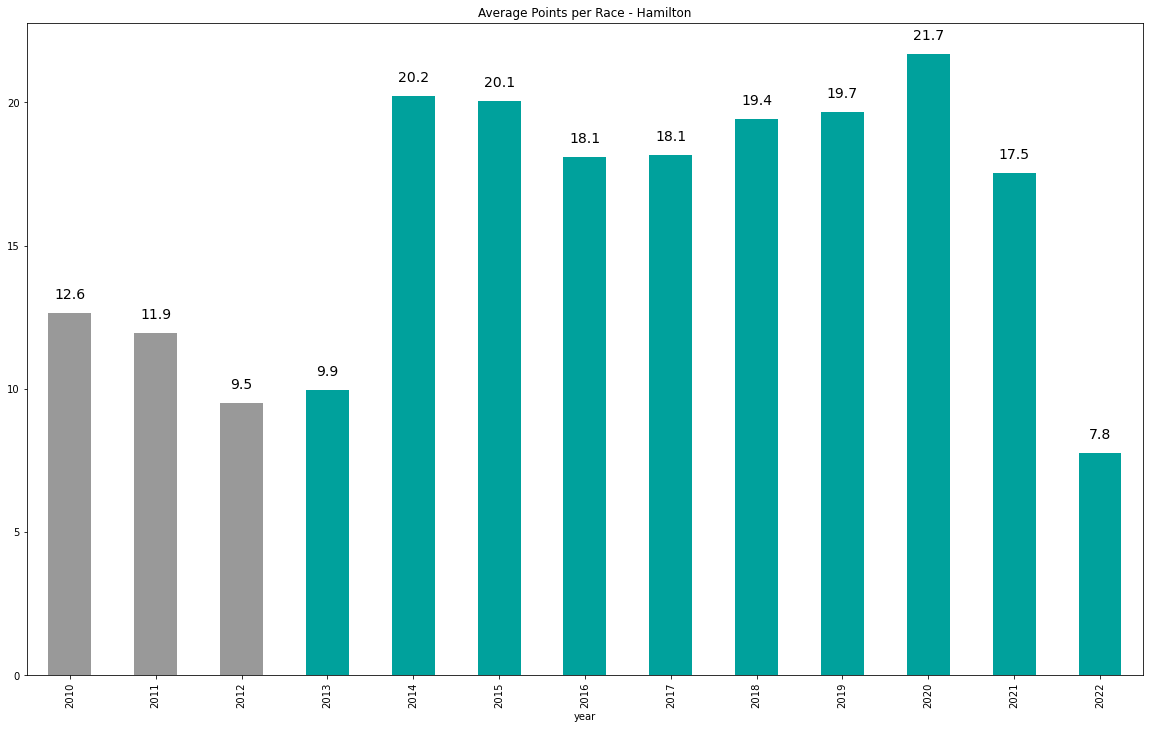

In [4]:
recent_df = race_df[race_df["year"] >= 2010]
avg_pts_by_year = recent_df.groupby("year").mean()["points"]
ax = avg_pts_by_year.plot(
  kind="bar",
  title="Average Points per Race - Hamilton",
  color=colors,
  figsize=(20, 12),
)

for idx, p in enumerate(avg_pts_by_year):
  ax.text(idx, p + 0.5, f"{p:0.1f}", ha="center", fontsize=14)